In [1]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

 ## CNN in MNIST Data

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test, y_test)= mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
y_test.shape

(10000,)

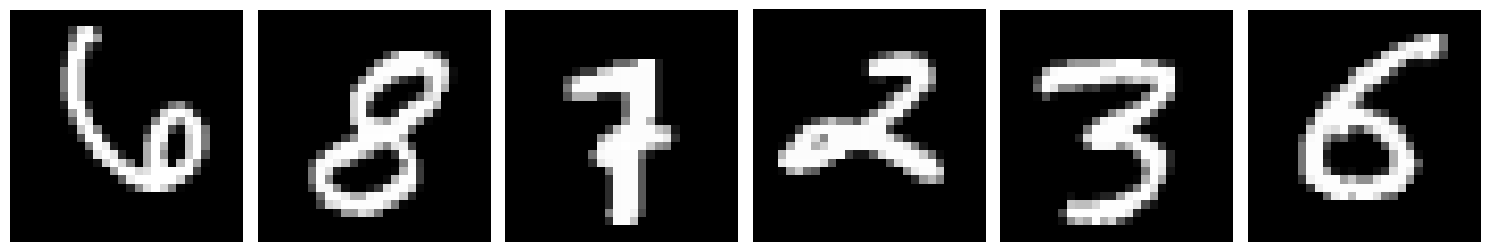

In [6]:
import matplotlib.pyplot as plt
import numpy as np
 
# Select 6 images (you can choose specific indices if needed)
indices = np.random.choice(len(X_train), 6, replace=False)
selected_images = [X_train[i] for i in indices]
 
# Create subplots
fig, axes = plt.subplots(1, 6, figsize=(15, 5))
 
# Plot each image
for ax, img in zip(axes, selected_images):
    ax.imshow(img, cmap='gray')  # Display image in grayscale
    ax.axis('off')  # Turn off axes for a cleaner look
 
# Display the plot
plt.tight_layout()
plt.show()

In [7]:
#data preprocessing
X_train=X_train.reshape(*X_train.shape,1)
X_test=X_test.reshape(*X_test.shape,1)

X_train= X_train /255.0
X_test= X_test /255.0


## model defination

In [8]:
input_shape= X_train.shape[1:]
num_classes=len(np.unique(y_train))

In [9]:
# model= Sequential()
# model.add(Input(shape=input_shape))

# model.add(Conv2D(filters=6, kernel_size=(5,5), stride=(1,1), padding='valid', activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2), strides=1))


# model.add(Conv2D(filters=16, kernel_size=(5,5), stride=(1,1), padding='valid', activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2), strides=2))


# model.add(Flatten())
# model.add(Dense(120, activation='relu'))
# model.add(Dropout(0.25))
# model.add(Dense(100, activation='relu'))
# model.add(Dense(num_classes, activation='softmax'))


In [10]:
model = Sequential()
model.add(Input(shape=input_shape))

model.add(Conv2D(filters=6, kernel_size=(5,5), strides=(1,1), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=1))

model.add(Conv2D(filters=16, kernel_size=(5,5), strides=(1,1), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))

model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(100, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 24, 24, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 23, 23, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 19, 19, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 9, 9, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1296)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 120)                 │         155,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          12,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 171,322 (669.23 KB)

 Trainable params: 171,322 (669.23 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(
    optimizer='Adam',
    loss= 'sparse_categorical_crossentropy',
    metrics=['accuracy']
    
)

In [13]:
history = model.fit(
    X_train, 
    y_train, 
    epochs=5, 
    batch_size=64, 
    verbose=1, 
    validation_split=0.2
)


Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 26s 31ms/step - accuracy: 0.9286 - loss: 0.2328 - val_accuracy: 0.9805 - val_loss: 0.0653
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - accuracy: 0.9764 - loss: 0.0787 - val_accuracy: 0.9847 - val_loss: 0.0529
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 27ms/step - accuracy: 0.9821 - loss: 0.0564 - val_accuracy: 0.9879 - val_loss: 0.0434
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.9866 - loss: 0.0431 - val_accuracy: 0.9853 - val_loss: 0.0505
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - accuracy: 0.9887 - loss: 0.0370 - val_accuracy: 0.9887 - val_loss: 0.0419


In [14]:
import pandas as pd
df= pd.DataFrame(history.history)

In [15]:
df

,accuracy,loss,val_accuracy,val_loss
0,0.928646,0.232796,0.980500,0.065330
1,0.976375,0.078716,0.984667,0.052857
2,0.982083,0.056394,0.987917,0.043423
3,0.986646,0.043080,0.985333,0.050463
4,0.988708,0.036976,0.988750,0.041903


<Axes: >

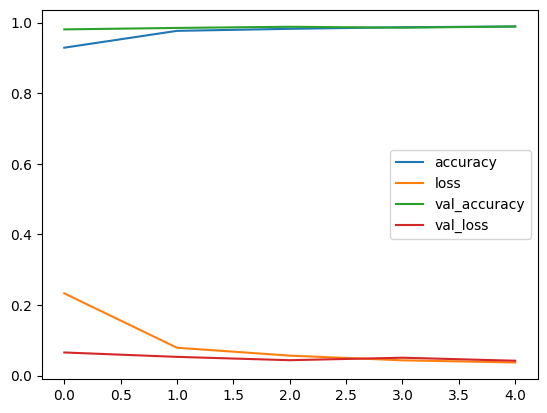

In [16]:
df.plot.line()

<Axes: >

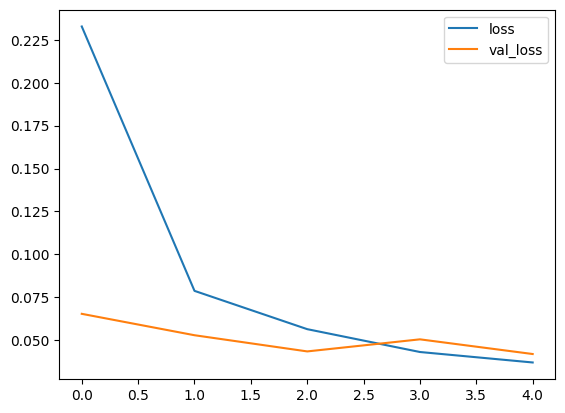

In [17]:
df[['loss', 'val_loss']].plot.line()

In [18]:
pred = np.argmax(model.predict(X_test), axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [19]:
y_test

array([7, 2, 1, ..., 4, 5, 6], shape=(10000,), dtype=uint8)

In [20]:
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, f1_score

In [21]:
print("y_test shape:", y_test.shape)
print("pred shape:", pred.shape)


y_test shape: (10000,)
pred shape: (10000,)


In [22]:
confusion_matrix(y_test, pred)

array([[ 973,    0,    3,    0,    0,    0,    0,    2,    2,    0],
       [   0, 1126,    1,    2,    0,    1,    1,    3,    1,    0],
       [   0,    0, 1023,    0,    0,    0,    0,    8,    1,    0],
       [   0,    0,    0, 1005,    0,    1,    0,    1,    3,    0],
       [   0,    1,    0,    0,  973,    0,    1,    2,    1,    4],
       [   1,    0,    0,   11,    0,  877,    1,    1,    0,    1],
       [   4,    3,    2,    0,    4,    3,  940,    0,    2,    0],
       [   0,    1,    2,    2,    0,    0,    0, 1021,    0,    2],
       [   1,    0,    3,    1,    0,    1,    0,    1,  963,    4],
       [   0,    1,    0,    2,    5,    2,    0,    3,    0,  996]])

In [23]:
import numpy as np
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, f1_score

# Predict on test set (10,000 samples)
pred = np.argmax(model.predict(X_test), axis=1)

# y_test is already integers (0–9), no need for argmax
y_test_labels = y_test  

# Confusion matrix
cm = confusion_matrix(y_test_labels, pred)
print("Confusion Matrix:\n", cm)

# Metrics
print("Accuracy:", accuracy_score(y_test_labels, pred))
print("Recall:", recall_score(y_test_labels, pred, average='macro'))
print("F1 Score:", f1_score(y_test_labels, pred, average='macro'))


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
Confusion Matrix:
 [[ 973    0    3    0    0    0    0    2    2    0]
 [   0 1126    1    2    0    1    1    3    1    0]
 [   0    0 1023    0    0    0    0    8    1    0]
 [   0    0    0 1005    0    1    0    1    3    0]
 [   0    1    0    0  973    0    1    2    1    4]
 [   1    0    0   11    0  877    1    1    0    1]
 [   4    3    2    0    4    3  940    0    2    0]
 [   0    1    2    2    0    0    0 1021    0    2]
 [   1    0    3    1    0    1    0    1  963    4]
 [   0    1    0    2    5    2    0    3    0  996]]
Accuracy: 0.9897
Recall: 0.9895498928532762
F1 Score: 0.989638130917524
